In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportions_ztest

# [과제1]

In [8]:
import csv

f = open('ANOVA.csv', 'r')
reader = csv.reader(f)
dic = {}
i = 0

for row in reader:
    if i == 0:
        i += 1
        continue
    if row[2] not in dic:
        dic[row[2]] = []
        dic[row[2]].append(row[0])
    else:
        dic[row[2]].append(row[0])

df = pd.DataFrame(dic)

f_result = stats.f_oneway(df['a'],df['b'],df['c'],df['d'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

F 통계량: 4.172
p-value: 0.019


1. 가설설립
 * 귀무가설 : 강종별 2차정련 시간에 차이가 있다고 할 수 없다.
 * 대립가설 : 강종별 2차정련 시간에 차이가 있다고 할 수 있다.
 
 
2. 가설검정
 * 검정통계량 : 4.172
 * p-value : 0.019
 * 유의수준 : 0.05
 
 
3. 검정결과 판단
 * p-value < 유의수준 이므로 귀무가설을 기각한다.
 
 
4. 결론
 * 강종별 2차정련 시간에 차이가 있다고 할 수 있다.

# [과제2]

In [9]:
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr,pval = stats.pearsonr(df1,df2)

print("corr: {:.3f}".format(corr))
print("p-value: {:.3f}".format(pval))

corr: -0.723
p-value: 0.000


1. 가설설립
 * 귀무가설 : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 없다.
 * 대립가설 : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다.
 
 
2. 가설검정
 * p-value : 0.000
 * 유의수준 : 0.05
 
 
3. 검정결과 판단
 * p-value < 유의수준 이므로 귀무가설을 기각한다.
 
 
4. 결론
 * 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다.

# [과제3]

In [2]:
STRENGTH = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,
            36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
BTIME = [0.798922,0.84902,0.816163,0.758266,0.815894,0.807477,0.809068,0.7664,0.742243,
         0.751118,0.740629,0.751495,0.738863,0.827428,0.818172,0.740939,0.757128,0.804695,0.695121,0.735377]

STRENGTH = sm.add_constant(STRENGTH)
model = sm.OLS(BTIME,STRENGTH)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.95e-05
Time:                        13:12:40   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.135      0.017      0.9

(0.9451944828033447, 0.29996079206466675)

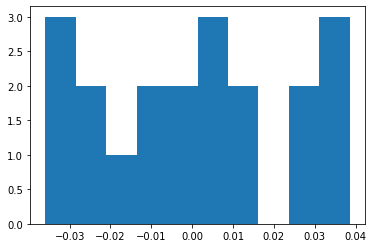

In [4]:
# 정규성 검정
plt.hist(result.resid)
shapiro(result.resid) # 정규성 없음

**[정규성]**
1. 가설설립
 * 귀무가설 : 정규성이 없다
 * 대립가설 : 정규성이 있다
 
 
2. 가설검정
 * 검정통계량 : 0.945
 * p-value : 0.299
 * 유의수준 : 0.05
 
 
3. 검정결과 판단
 * p-value > 유의수준 이므로 정규성이 없다
 
 
4. 결론
 * 정규성이 없다

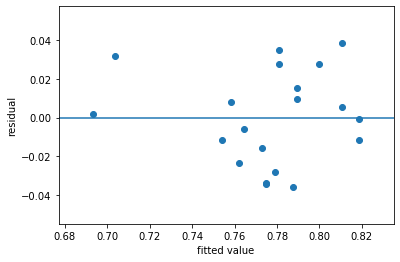

In [12]:
# 등분산성 검정
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")

**[등분산성]**
* 잔차들이 수평축 0을 중심으로 일정한 경향을 가지고 랜덤하게 나타나지 않았다.
* 예측값이 증가함에 따라 퍼진 정도가 증가하는 모습을 보인다.
* 따라서 등분산성을 하지 않는다고 할 수 있다.


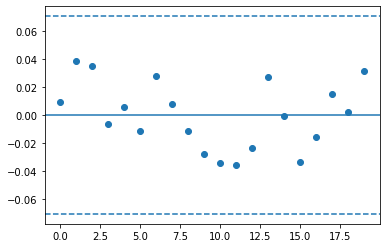

In [13]:
# 독립성 검정(관리도)
plt.scatter(range(0,20), result.resid, marker='o')
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(result.resid),linestyle="--")
plt.axhline(y=-3*np.std(result.resid),linestyle="--")

**[독립성]**
* 앞서 result.summary()의 결과값을 보면 Durbin-Watson 값이 1.128 임을 확인할 수 있다. 해당 값은 0과 2 사이에 존재하고, 0에 밀접하게 근접하지는 않기 때문에 약한 양의 상관관계라고 볼 수 있다.